James DeMarco
CISC 3410
monday 6:30pm
lab 4 

    The dataset I have chosen for this lab is a wine quality dataset. The reason I choose this dataset is because my uncle has a large wine collection and over the years he has shared several from his collection with me. So im curious as to what makes the quality of wine good or bad.
    The dataset I recieved from kaggle.com which is a datascience website that provided datasets for free. This dataset came with 11 features; fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol and quality. 
    The question I want to answer with this dataset is what factors determine a wine to be of good quality. In preparation of the data every feature came in numerical form. However the 'quality' attribute comes set on a scale of 1-5. To fix this the value is changed from a scale of 1-5 to good or bad, then changed to binary values 0 and 1. There were no strings attached that needed to be accounted for or any missing or null values to fill. However to see which factors contributed most to the higher quality wines we need to see which features had the most impact on the quality of the wine. 
    Some of the code used is borrowed from our textbook and altered for this database. Some other code was included with this dataset as a tutorial for learning.
    

In [58]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

#Importing packages needed for analysis of the dataset.

In [6]:
wineData = pd.read_csv('C:\DataSets\winequality-red.csv')
# this code is used to load the dataset into a variable wineData

In [7]:
wineData.head()
# this snippet shows us what the features are in the data set and the values for the first 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
wineData.describe()
# shows us the values of the distribution for each feature in our dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


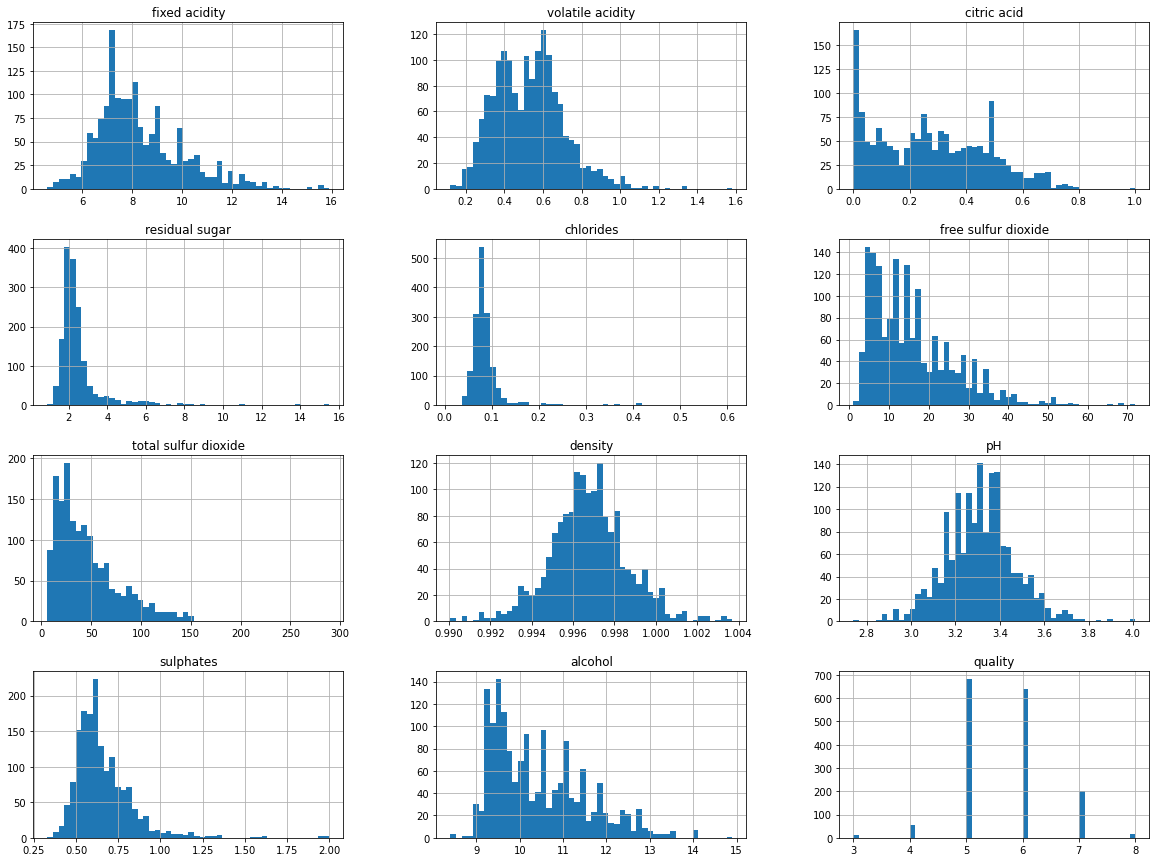

In [8]:
wineData.hist(bins=50, figsize=(20,15))
plt.show()

#Above we run a histogram plot to show us how each of the features values are distributed. This tells us the avg of 
#the data variables and  where these values are most likely to fall. The distribution factors are shown below.

In [15]:
wineData_matrix= wineData.corr()
wineData_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

array([[<AxesSubplot:xlabel='quality', ylabel='quality'>,
        <AxesSubplot:xlabel='alcohol', ylabel='quality'>,
        <AxesSubplot:xlabel='sulphates', ylabel='quality'>,
        <AxesSubplot:xlabel='citric acid', ylabel='quality'>],
       [<AxesSubplot:xlabel='quality', ylabel='alcohol'>,
        <AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='sulphates', ylabel='alcohol'>,
        <AxesSubplot:xlabel='citric acid', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='quality', ylabel='sulphates'>,
        <AxesSubplot:xlabel='alcohol', ylabel='sulphates'>,
        <AxesSubplot:xlabel='sulphates', ylabel='sulphates'>,
        <AxesSubplot:xlabel='citric acid', ylabel='sulphates'>],
       [<AxesSubplot:xlabel='quality', ylabel='citric acid'>,
        <AxesSubplot:xlabel='alcohol', ylabel='citric acid'>,
        <AxesSubplot:xlabel='sulphates', ylabel='citric acid'>,
        <AxesSubplot:xlabel='citric acid', ylabel='citric acid'>]],
      dtype=object)

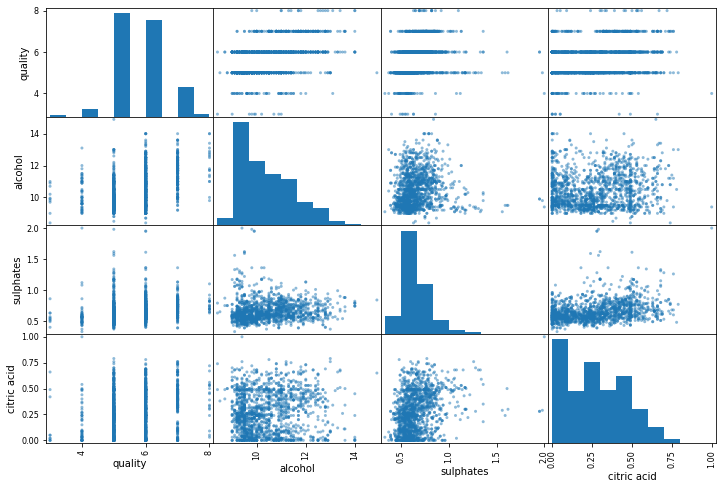

In [22]:
attributes= ["quality", "alcohol", "sulphates","citric acid"]
scatter_matrix(wineData[attributes],figsize=(12,8))

# here we show a scatter matrix with variables alcohol,sulphates and citric acid.
# The scatter matrix shows how the variables selected hold up to one another in referene allowing us to 
# observe trends between quality and other variables.

In [37]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wineData['quality'] = pd.cut(wineData['quality'], bins = bins, labels = group_names)

# We change the attribute of quality to take on binary values to indicate either good or bad quality.

label_quality = LabelEncoder()
wineData['quality'] = label_quality.fit_transform(wineData['quality'])

# we take the quality attribute and now change it so that 0 is bad and 1 is good
#Now our data is fit to work with

In [38]:
wineData.head()
x = wineData.drop('quality', axis = 1)
y = wineData['quality']

# We set x as an array of feature values making up quality wine.
# we set y as wine quality with binary format.

In [39]:
sc = StandardScaler()
#Applying Standard scaling so we can obtain better results by bringing values to the same scale

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
#Train and Test splitting of data 

In [41]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Here we apply the standard scaler to the data features

In [42]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

#Here we run a random forest classifier which is built from decision trees.
#The rfc uses several trees of random models to predict the quaity of the wine using other features
#decision trees works well with the data fed to it but it does not work as well on new examples.
#rfc works by randomly selecting samples that get bootstrapped to another dataset.
# the rfc then makes a decision tree using the bootstraped dataset, at each step it randomly selects new features for the next
#step. From this we obtain several trees with different features at each step.
# Then when looking at an example for classification we run the tuple through each tree and obtain various predicitons.
#once we have run the example through each tree we see which answer that was most frequently concluded. If good quality was
#selected by majority of the trees we conclude the wine quality was good.


print(classification_report(y_test, pred_rfc))
#Let's see how our model performed
#we got an accuracy of 88% which is pretty good

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.66      0.40      0.50        47

    accuracy                           0.88       320
   macro avg       0.78      0.68      0.72       320
weighted avg       0.87      0.88      0.87       320



In [44]:
print(confusion_matrix(y_test, pred_rfc))

#We got a total of 263 true positives
#19 true negatives 10 false negatives and 28 fale positives.
#88% of out predictions were correctly classified.
#false positives were most likely to be the cause of error in our prediction.
# All in all we did have positive results for this classification measure.

[[263  10]
 [ 28  19]]


In [48]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

print(classification_report(y_test, pred_sgd))
print(confusion_matrix(y_test, pred_sgd))

# Here we run a stochastic gradient descent classifier.
#SGD classifier is a linear classifier. The sgd classifier uses sgd to arrive at the global minimum value for features. 
#The minimum is used to find a decision boundary for the quality and that feature. This algo runs faster than others 
#but may not be as accurate due to its randomized nature. Altering the learning rate could affect how well this 
#algorithm performs by reducing the learning rate over time allowing for a greater chance of convergence. 

#Below we see the results and a confusion matrix for the model.
#we have 86% correctly classified predicions which is good but not amazing.
# this model isent as good as the random forest classifier but its not far off.
#The Sgd classifier has very low false negatives but high false positives. Depending on the situation this may not be useful.
#In courts this would mean convicting more innocent people of crimes. So perhaps this is not the best model of the bunch.

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       273
           1       1.00      0.02      0.04        47

    accuracy                           0.86       320
   macro avg       0.93      0.51      0.48       320
weighted avg       0.88      0.86      0.79       320

[[273   0]
 [ 46   1]]


In [57]:
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(x,y.ravel())

sgd_reg.intercept_,sgd_reg.coef_

#Here we obtain the results for y intercept along with slopes for each of the features in our x. 

(array([-8.29329021e+10]),
 array([ 7.63705326e+10, -2.44887468e+10, -2.78875361e+11, -1.66568056e+09,
         3.90048253e+09,  8.98535819e+10,  1.16485164e+11, -8.28341970e+10,
         1.94438247e+11, -2.41247684e+11,  1.28455730e+11]))

In [53]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



Here we have a support vector classifier. Support vector classification works by creating a linear line to seperate the data, based on the closest training instances. This linear line creates a decision boundary for the data.
When a data point is above or below the decision boundary we obtain a classification for good or bad quality wine.
The support vector classification performed on par with the random forest classifier.
This model obtained an accuracy of 88% which is a pretty good measure of identification.



My results showed me that the parameters which most affect wine quality is the alcohol content, volatile acids,citric acids, and sulphates. I also found I was able to determine a wines quality with a fair amount of accuracy given the features. 
I believe of all my classification tests the svc classifier was the best performing. It had a tie for the highest accuracy but it dident suffer from the same bias of the sgc towards false positives. The rfc is not as good at extrapolating to future datasets. For this reason I believe the svc model to be the best performing.

I learned alot from this project. Aside from becoming more familiar with sklearn and python ive learned More about the topic itself. I learned why its important to standardize your data and also why we need to consider our data set more thoughroughly beforeahand. Before this dataset I chose to try and work with a financial dataset. however I realized it was much differnet working with financial series and did not think id be able to learn it in time to complete the project with good test results.


Citations:
    
    V. (2018, January 19). Prediction of quality of Wine. Kaggle. Retrieved October 13,2021, 
        from https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine/notebook
    
    Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: 
        Concepts, Tools, and Techniques to Build Intelligent Systems (2nd ed.). O’Reilly Media.
        
    sklearn.linear_model.SGDClassifier. (n.d.). Scikit-Learn. Retrieved October 13, 2021, from 
        https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html